# CAPSTONE PROJECT 2 -- MOVIE PREDICTION AND RECOMDENDATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import datetime

# Loading the data
- Generation the data from the API 

In [2]:
df = pd.read_csv('data/movie_metadata_self_collect.csv', lineterminator='\n', date_parser= ['release_date'])

In [3]:
df.columns = ['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'vote_count_1']

In [4]:
df.head().T

,0,1,2,3,4
adult,False,False,False,False,False
backdrop_path,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,/y7SQmjlB42VvYyRIFQXLQ4ZYrn.jpg,/vAZZrfi0xwE226zpSTAbJ7gUWwf.jpg,NaN,/wKQlgHjJwh5mGBZ37vDsXBx9zbh.jpg
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...","{'id': 495527, 'name': 'Jumanji Collection', '...","{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,http://www.sonypictures.com/movies/jumanji/,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II


In [5]:
##Inspecting the data. So you can see that have 20 column is object and 4 column is float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247784 entries, 0 to 247783
Data columns (total 26 columns):
adult                    247784 non-null bool
backdrop_path            65632 non-null object
belongs_to_collection    6322 non-null object
budget                   247784 non-null int64
genres                   247784 non-null object
homepage                 27772 non-null object
id                       247784 non-null int64
imdb_id                  157776 non-null object
original_language        247784 non-null object
original_title           247784 non-null object
overview                 202960 non-null object
popularity               247784 non-null float64
poster_path              184540 non-null object
production_companies     247784 non-null object
production_countries     247784 non-null object
release_date             216381 non-null object
revenue                  247784 non-null int64
runtime                  203942 non-null float64
spoken_languages         247784 

In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,vote_count_1
count,2.477840e+05,247784.000000,247784.000000,2.477840e+05,2.039420e+05,247784.000000,84734.000000,163050.000000
mean,9.752955e+05,496842.413110,1.598153,4.392323e+06,5.614684e+02,1.968781,126.655203,1.275044
std,3.912725e+07,198577.393382,3.059260,1.085196e+09,1.576655e+05,3.086484,745.410488,31.299157
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,488308.750000,0.600000,0.000000e+00,1.400000e+01,0.000000,0.000000,0.000000
50%,0.000000e+00,558370.500000,0.600000,0.000000e+00,7.700000e+01,0.000000,3.000000,0.000000
75%,0.000000e+00,627633.250000,1.139000,0.000000e+00,9.900000e+01,5.000000,24.000000,0.000000
max,1.500000e+10,695549.000000,184.473000,5.400000e+11,5.050505e+07,10.000000,25362.000000,4344.000000


### Overview the Features
- adult: Indicates if the movie is X-Rated or Adult.
- belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
- budget: The budget of the movie in dollars.
- genres: A stringified list of dictionaries that list out all the genres associated with the movie.
- homepage: The Official Homepage of the move.
- id: The ID of the move.
- imdb_id: The IMDB ID of the movie.
- original_language: The language in which the movie was originally shot in.
- original_title: The original title of the movie.
- overview: A brief blurb of the movie.
- popularity: The Popularity Score assigned by TMDB.
- poster_path: The URL of the poster image.
- production_companies: A stringified list of production companies involved with the making of the movie.
- production_countries: A stringified list of countries where the movie was shot/produced in.
- release_date: Theatrical Release Date of the movie.
- revenue: The total revenue of the movie in dollars.
- runtime: The runtime of the movie in minutes.
- spoken_languages: A stringified list of spoken languages in the film.
- status: The status of the movie (Released, To Be Released, Announced, etc.)
- tagline: The tagline of the movie.
- title: The Official Title of the movie.
- video: Indicates if there is a video present of the movie with TMDB.
- vote_average: The average rating of the movie.
- vote_count: The number of votes by users, as counted by TMDB.

In [7]:
# We are not interest in these column, so just drop it. 
df.drop(['backdrop_path','vote_count_1', 'homepage','original_title'], axis =1, inplace= True)

# Data Wrangling and Visualization 

- Let consider the budget column and revenue first, that we are alway spending the money to producti movie. But we see that these two column are have a lot data with 0, so we consider it is missing value. 
- Let replace it with the np.nan first
- And popularity also we consider 0 is missing value

In [8]:
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
df['popularity'] = df['popularity'].replace(0, np.nan)

- The raw data of  belong_to_collection is format as is list of dictionaries contain ID and name of that collections tion
- But we only interest in the name of collection, so first we need fill missing value with the same format as data
- Then we apply the function to return only the name of collections

In [9]:
##Fill the missing with the name missing_name
df['belongs_to_collection'].fillna(str({'name': None}), inplace =True)

In [10]:
## Convert belong to to name
def convert_belongcolumn_to_list(data):
    data = eval(data) #eval use to convert the string of list to the list ex. '[1,2,3]' = [1,2,3]
    if type(data) == float or type(data) == int:
        return None
    else:
        return data['name']

In [11]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(convert_belongcolumn_to_list)

- For column production_companies, production_countries, genres and spoken_languages
- They are format as the string of list of dictionaries of names it assign to it
- So we do the same as belongs_to_collection, that is create the function and apply to it column and return list of name of it.

In [12]:
##Convert genres to only genres name
## eval() function to convert to string of list to a list '[1,2,3]' = [1,2,3]
def convert_object_to_list(data):
    data = eval(data)
    empty = []
    try:
        for z in data:
            empty.append(z['name'])
        return empty
    except: 
        return None

In [13]:
df['genres']= df['genres'].apply(convert_object_to_list)
df['production_countries'] = df['production_countries'].apply(convert_object_to_list)
df['spoken_languages'] = df['spoken_languages'].apply(convert_object_to_list)

In [14]:
df['production_companies'] = df['production_companies'].apply(convert_object_to_list)

- Now we going add some column to our data set
- Year: Get idea for movie production each year
- ratio_revenue: get idea movie success or fail
- Return: How much profit was make each company

In [15]:
### Convert released_date to date_time format
df['release_date'] = pd.to_datetime(df.release_date)

In [16]:
### Add column year
df['year'] = df.release_date.apply(lambda x: x.year)

In [17]:
## Fill NaN with 0 and convert year to int
df['year'].fillna(0, inplace = True)
df['year'] = df.year.astype(int)

In [18]:
### Created a new column for data name ratio_revenue
df['ratio_revenue'] = df['revenue'] / df['budget']

In [19]:
##Let make another column for total the number company are was make a movie
### Get the max number in in movie
### maybe add new column in later for total company
number_company = []
for i in df.production_companies:
    try:
        number_company.append(len(i))   
    except:
        print(i) ## point where is error

In [20]:
df['number_company'] = number_company

In [21]:
##Return column (revenue - budget)
df['return'] = df['revenue'] - df['budget']

In [22]:
### get df for only movie have information above budget and revenue
df_ratio_revenue = df[~df['ratio_revenue'].isnull()]

## Filter dataframe

- Year column is greater than 0 and less than 2020
- Title have to have title
- We just interest in the movie are released
- we dont want include adult movie

In [23]:
df = df[(df.year > 0) & (df.year < 2020)]

In [24]:
df = df[~df.title.isna()].reset_index()

In [25]:
df = df[df.status == 'Released']

In [26]:
df = df[df.adult == False]

# VISUALIZATION

## Generation the Cloudword for our collection

In [27]:
collection_name = df.belongs_to_collection.fillna('')
collection_name = ' '.join(collection_name)

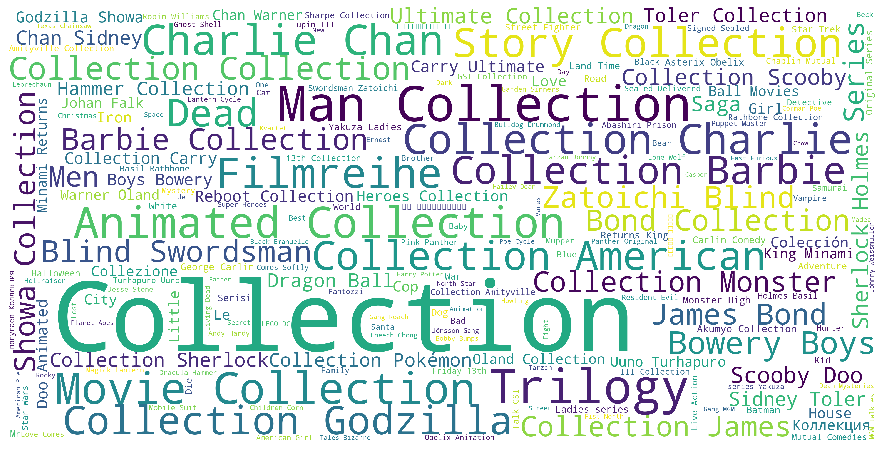

In [28]:
Collection_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(collection_name)
plt.figure(figsize=(16,8))
plt.imshow(Collection_wordcloud)
plt.axis('off')
plt.show()

# Overview film industry over year

In [29]:
year_gr = df.groupby('year').agg({'revenue':['mean','sum','count']})
year_gr.columns = ['Average_revenue','Total_revenue','count']
year_gr.sort_values(by='Total_revenue', ascending = False, inplace = True)

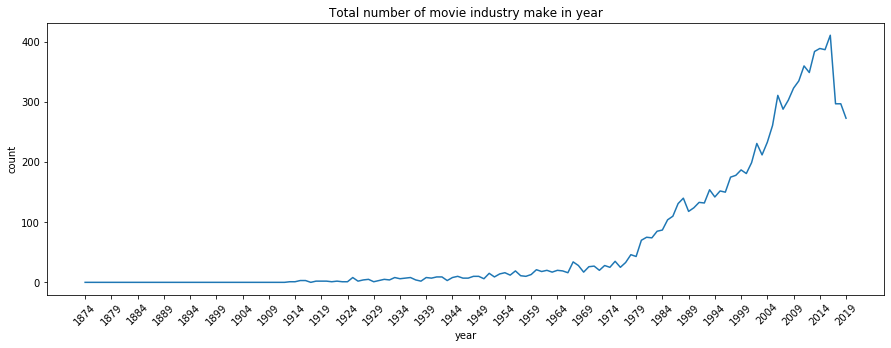

In [30]:
xtick = np.arange(1874,2020,5)
_ = plt.figure(figsize = (15,5))
_ = sns.lineplot(x = year_gr.index, y = 'count', data = year_gr)
_ = plt.title('Total number of movie industry make in year')
_ = plt.xticks(xtick, rotation = 45)


- Total the number of movie was increasing by year, and from 1974 the film industry was begin increasing shape more. As data we have, let look at top 10 year revenue. This is just idea for over look the industry, because our data was have alot missing revenue data. 

In [31]:
year_gr.head(10)

,Average_revenue,Total_revenue,count
year,,,
2016,7.627827e+07,3.135037e+10,411
2015,7.414786e+07,2.869522e+10,387
2014,7.113407e+07,2.767116e+10,389
2013,7.039734e+07,2.703258e+10,384
2012,7.569661e+07,2.641812e+10,349
2011,6.939981e+07,2.498393e+10,360
2010,7.205477e+07,2.413835e+10,335
2009,7.440009e+07,2.403123e+10,323
2008,6.991971e+07,2.118567e+10,303


- As I expected, that the revenue are inscreasing for each year. The film industry are make over 30 billion dota in 2016.
- Now let take a look at 5 early and last movie of our data set

In [32]:
df[['year','title','runtime']].sort_values(by = 'year').head(5)

,year,title,runtime
34693,1874,Passage of Venus,1.0
34690,1878,Sallie Gardner at a Gallop,1.0
70946,1881,Athlete Swinging a Pick,1.0
41270,1883,Buffalo Running,1.0
135279,1885,L'homme machine,1.0


In [33]:
df[['year','title','runtime']].sort_values(by = 'year').tail(5)

,year,title,runtime
174446,2019,Sunday,13.0
174441,2019,Queen + Béjart - Ballet For Life,58.0
126731,2019,The Ocean Washed Open Your Grave,3.0
174467,2019,Entropia,28.0
210551,2019,Jorge,20.0


# Overview film industry in each Countries

In [34]:
### convert the list of company the to single company
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Countries'

In [35]:
countries_df = df.drop('production_countries', axis=1).join(s)

In [36]:
countries_df = countries_df[~countries_df.Countries.isna()]

In [37]:
#### See the each countries make how many film and profit did they got
movies_countries = countries_df.groupby('Countries').agg({'revenue':['mean','sum','count']})
movies_countries.columns = ['average_revenue','total_revenue','number_movie']
movies_countries.sort_values(by = 'number_movie', ascending = False, inplace = True)

- Now we can see the top 10 that countries was make the most revenue in film industry.
    - Bellow you see that USA was have the most revenue and have product alot movie compare to another countries.
- This is just for you have idea which countries was product movie, but the total revenue maybe little biggest than the actual revenue. Because we have some movie was make more than 1 countries, and we just make a make dupilate revenue for that countries with same revenue

In [38]:
movies_countries.head(10)

,average_revenue,total_revenue,number_movie
Countries,,,
United States of America,7.714978e+07,4.976932e+11,6451
United Kingdom,6.990096e+07,7.514353e+10,1075
France,3.021624e+07,2.084921e+10,690
Germany,6.078097e+07,3.014736e+10,496
Canada,5.485054e+07,2.089806e+10,381
India,1.911960e+07,7.246328e+09,379
Japan,3.894279e+07,9.969354e+09,256
Italy,2.382187e+07,5.169346e+09,217
Spain,2.157035e+07,4.378782e+09,203


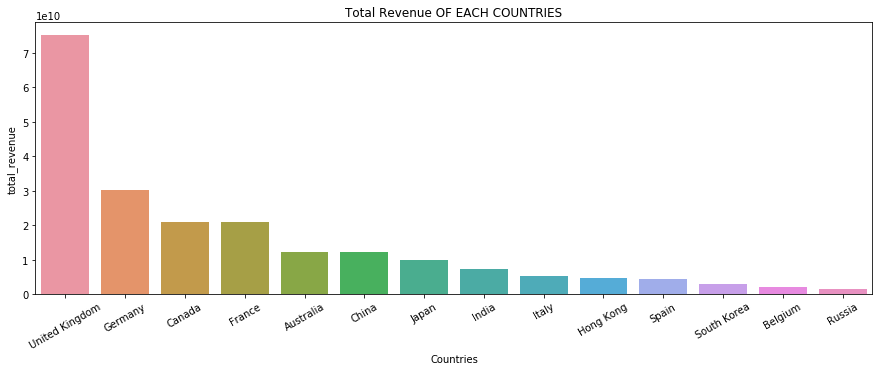

In [39]:
### Average profit of each countries
total_revenue = movies_countries[['total_revenue']][1:15]
total_revenue.sort_values(by = 'total_revenue', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = total_revenue.index, y = total_revenue.total_revenue)
_ = plt.title('Total Revenue OF EACH COUNTRIES')
_ = plt.xticks(rotation = 30)

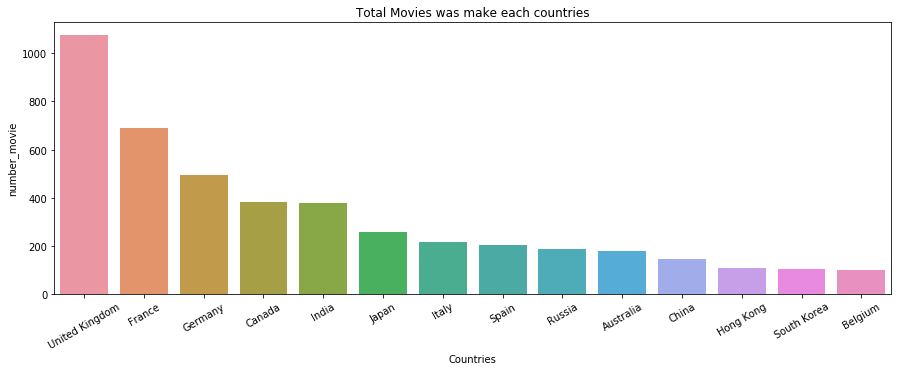

In [40]:
movies = movies_countries[['number_movie']][1:15]
movies.sort_values(by = 'number_movie', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = movies.index, y = movies.number_movie)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Movies was make each countries')

- USA was the top country make the most movie and revenue on movie industry. So we just let left the USA out and see that UK is second countried was product movie.
- France are rank 3 product movie, but their revenue was at rank 5. China is kind opposite, they was rank 12 of countries product movie, but their revenue was rank 7.  

# Overview the company in movie industry

In [41]:
### convert the list of company the to single company
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [42]:
company_df = df.drop('production_companies', axis=1).join(s)

In [43]:
company_df = company_df[~company_df['return'].isna()]

In [44]:
company_df = company_df.groupby('companies').agg({'return': ['mean','sum','count']})
company_df.columns = ['Avergae_profit', 'Total_Profit', 'Number_movie']
company_df.sort_values(by = 'Number_movie', ascending = False, inplace = True)

- Let get idea which company is have the most profit. As we calculated that profit = revenue - budget
    - Company Warner Bros. Pictures make 4.2 billion profit with 476 movie
    - and the second was Universal Pictures with 4.1 billion profit

In [45]:
company_df.head(10)

,Avergae_profit,Total_Profit,Number_movie
companies,,,
Warner Bros. Pictures,9.032809e+07,4.299617e+10,476
Universal Pictures,9.229253e+07,4.088559e+10,443
Paramount,1.014296e+08,3.793466e+10,374
Columbia Pictures,7.684656e+07,2.697314e+10,351
20th Century Fox,1.164543e+08,4.017672e+10,345
Metro-Goldwyn-Mayer,5.015126e+07,1.003025e+10,200
New Line Cinema,8.415754e+07,1.598993e+10,190
Walt Disney Pictures,1.797291e+08,2.821747e+10,157
Touchstone Pictures,6.081461e+07,8.209972e+09,135


- Let Plot the data in histogram so we can easy see it

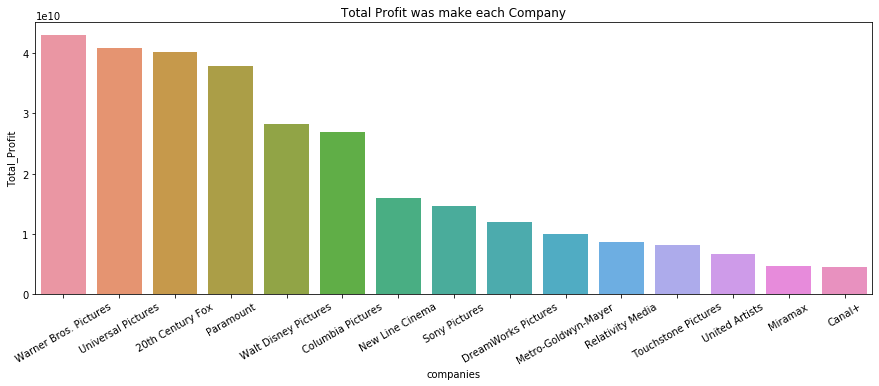

In [46]:
total_profit = company_df[['Total_Profit']][0:15]
total_profit.sort_values(by = 'Total_Profit', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = total_profit.index, y = total_profit.Total_Profit)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Profit was make each Company')

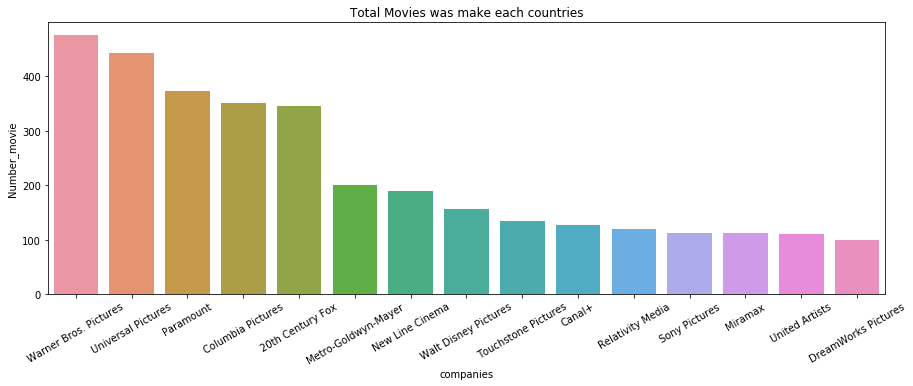

In [47]:
movies = company_df[['Number_movie']][0:15]
movies.sort_values(by = 'Number_movie', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = movies.index, y = movies.Number_movie)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Movies was make each countries')

- The top 4 companies make profit was are a most equal.
- The 20th Century Fox was in rank 5 product movies but, they make rank 3 of total profit.

- Let take a look in the collection of movie, see which series it was top.

# Collection of Movie

In [48]:
collection_df = df.groupby('belongs_to_collection').agg({'revenue': ['mean','sum','count']})
collection_df.columns = ['Average_revenue', 'Total_revenue', 'Total_movie']

In [49]:
collection_df.sort_values(by='Total_revenue',inplace = True, ascending = False)

In [50]:
collection_df.head(10)

,Average_revenue,Total_revenue,Total_movie
belongs_to_collection,,,
Harry Potter Collection,9.633598e+08,7.706879e+09,8
James Bond Collection,2.827486e+08,7.068715e+09,25
Star Wars Collection,9.112054e+08,6.378438e+09,7
The Fast and the Furious Collection,6.406373e+08,5.125099e+09,8
Pirates of the Caribbean Collection,9.043154e+08,4.521577e+09,5
Transformers Collection,8.758574e+08,4.379287e+09,5
Jurassic Park Collection,8.948083e+08,3.579233e+09,4
The Twilight Collection,6.686215e+08,3.343107e+09,5
Ice Age Collection,6.433533e+08,3.216767e+09,5


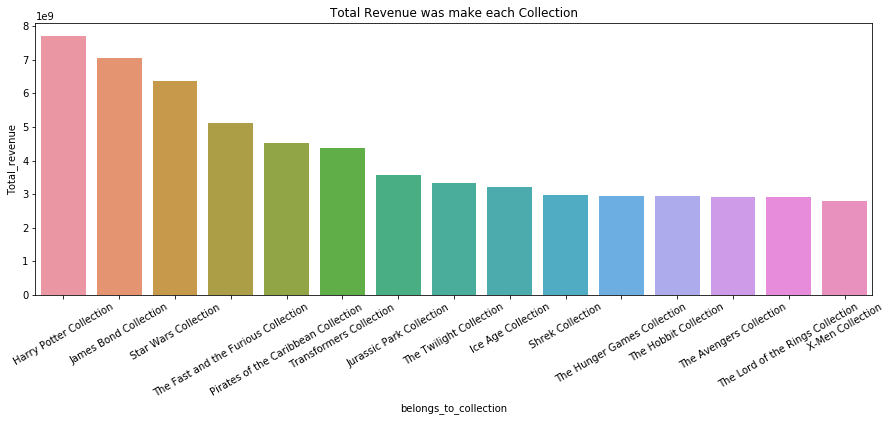

In [51]:
total_revenue = collection_df[['Total_revenue']][0:15]
total_revenue.sort_values(by = 'Total_revenue', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = total_revenue.index, y = total_revenue.Total_revenue)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Revenue was make each Collection')

- Harry Potter, James Bond, Star Wars and The Fast and the Furious is top 4 with revenue.
- These movie are so popular and alot people are like it, so it is not suprise when they are top 4 revenue in movie industry.

# Genre of movie
- Let discover which genre are make a good money

In [52]:
genre = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre.name = 'Genres'

In [53]:
genre_df = df.drop('genres', axis=1).join(genre)

In [54]:
genre_df_gr = genre_df.groupby('Genres').agg({'revenue': ['mean','sum','count']})
genre_df_gr.columns = ['Avergae_revenue','Total_revenue','Total_movie']

In [55]:
genre_df_gr.sort_values(by='Total_revenue',inplace = True, ascending = False)

In [56]:
genre_df_gr.head(10)

,Avergae_revenue,Total_revenue,Total_movie
Genres,,,
Action,1.025900e+08,2.134897e+11,2081
Adventure,1.640720e+08,2.086996e+11,1272
Comedy,5.798689e+07,1.889213e+11,3258
Drama,3.835340e+07,1.773078e+11,4623
Thriller,6.120269e+07,1.302393e+11,2128
Fantasy,1.463286e+08,1.122341e+11,767
Family,1.299991e+08,1.080293e+11,831
Science Fiction,1.181741e+08,1.016297e+11,860
Romance,4.568787e+07,8.073046e+10,1767


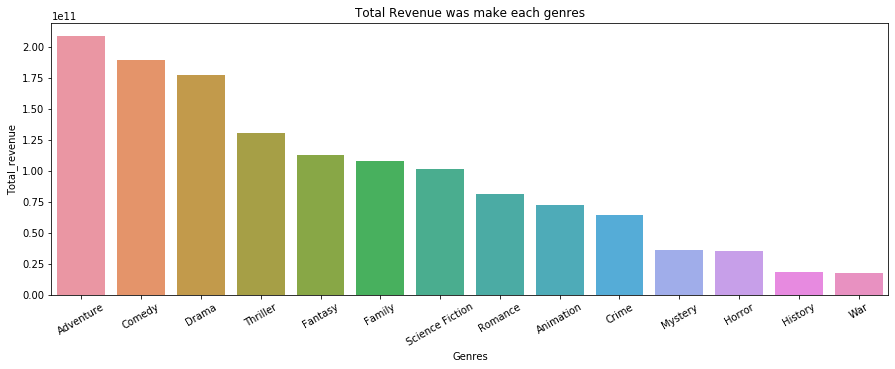

In [57]:
genre = genre_df_gr[['Total_revenue']][1:15]
genre.sort_values(by = 'Total_revenue', ascending = False, inplace = True)
_ = plt.figure(figsize = (15,5))
_ = sns.barplot(x = genre.index, y = genre.Total_revenue)
_ = plt.xticks(rotation = 30)
_ = plt.title('Total Revenue was make each genres')

- Top 3 genre was have most revenue was Adventure, Comedy and Drama.
- And War and history, and Horror are less revenue. It was make cause these type are just adult like, and horror movie not alot people like it, also it have a restrict age to watch the movie too. 

# Average vote

In [58]:
vote_df = pd.DataFrame(df[~df.vote_average.isna()][['title','genres','vote_average','year','vote_count','popularity']])

In [59]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189314 entries, 0 to 210551
Data columns (total 6 columns):
title           189314 non-null object
genres          189314 non-null object
vote_average    189314 non-null float64
year            189314 non-null int64
vote_count      77367 non-null float64
popularity      189287 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.1+ MB


In [60]:
## we assume that vote 0 it mean we doestn have data, so we replace it with na
vote_df['vote_average']= vote_df.vote_average.replace(0,np.nan)

In [61]:
## 60% of our vote_average are missing
## So we cant not just fill missing value with median or average. I decide to remove all the missing 
## Now we just base on the data we have to tell above movie vote_average
vote_df = vote_df[~vote_df.vote_average.isna()]

In [62]:
vote_df['vote_count'].fillna(vote_df['vote_count'].median(), inplace = True)

In [63]:
vote_df.sort_values(by ='vote_average', ascending = False, inplace = True)
vote_df.head()

,title,genres,vote_average,year,vote_count,popularity
84290,Premiata Forneria Marconi - PFM in Classic da ...,[],10.0,2013,15.0,0.600
49613,Technicolor Dream,[],10.0,2017,1.0,0.634
136597,Traces in the Sand,[],10.0,1954,15.0,0.600
68703,Expedition Sasquatch,[Documentary],10.0,2018,1.0,0.641
136556,O Cinema Que Não Se Vê,[Documentary],10.0,2018,15.0,0.600


In [64]:
vote_df.describe()

,vote_average,year,vote_count,popularity
count,71603.000000,71603.000000,71603.000000,71602.000000
mean,6.318632,1997.855453,153.658017,3.725849
std,1.568004,23.932855,807.867667,4.605601
min,0.500000,1874.000000,1.000000,0.600000
25%,5.500000,1987.000000,7.000000,0.988000
50%,6.300000,2008.000000,15.000000,2.314500
75%,7.100000,2016.000000,33.000000,4.455000
max,10.000000,2019.000000,25362.000000,129.205000


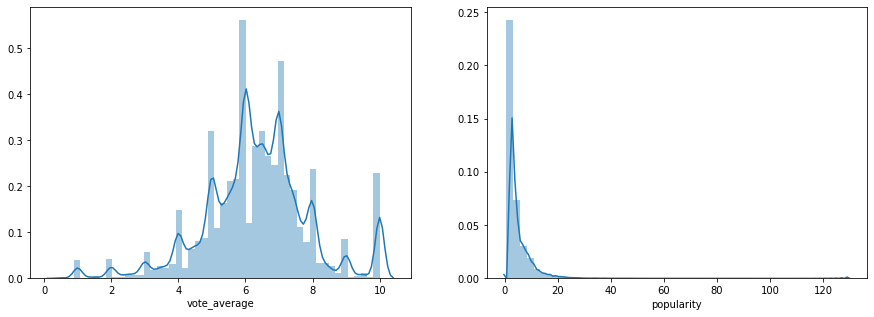

In [65]:
_ = plt.figure(figsize= (15,5))
_ = plt.subplot(1,2,1)
sns.distplot(vote_df.vote_average)
_ = plt.subplot(1,2,2)
sns.distplot(vote_df.popularity.fillna(vote_df.popularity.median()))

In [66]:
### Vote count great than 2000

vote_df_2000 = vote_df[vote_df.vote_count > 2000]

In [67]:
vote_df_2000.describe()

,vote_average,year,vote_count,popularity
count,1240.000000,1240.000000,1240.000000,1240.000000
mean,6.924274,2004.835484,4967.919355,22.860356
std,0.757241,12.658054,3439.947728,10.740846
min,4.300000,1936.000000,2001.000000,0.600000
25%,6.400000,2001.000000,2594.000000,16.956250
50%,6.900000,2008.000000,3721.500000,20.510000
75%,7.500000,2013.000000,5932.500000,26.180750
max,8.800000,2019.000000,25362.000000,129.205000


In [68]:
vote_df_2000 = vote_df_2000.sort_values(by ='vote_average', ascending = False)
vote_df_2000.head(10)

,title,genres,vote_average,year,vote_count,popularity
10288,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",8.8,1995,2247.0,30.290
314,The Shawshank Redemption,"[Drama, Crime]",8.7,1994,15772.0,60.107
834,The Godfather,"[Drama, Crime]",8.7,1972,11969.0,54.408
522,Schindler's List,"[Drama, History, War]",8.6,1993,9499.0,35.534
2211,Life Is Beautiful,"[Comedy, Drama]",8.5,1997,8616.0,30.194
1178,The Godfather: Part II,"[Drama, Crime]",8.5,1974,7058.0,36.223
66260,Parasite,"[Comedy, Thriller, Drama]",8.5,2019,6496.0,91.695
3030,The Green Mile,"[Fantasy, Drama, Crime]",8.5,1999,9935.0,31.193
39940,Your Name.,"[Romance, Animation, Drama]",8.5,2016,5315.0,32.500
5481,Spirited Away,"[Animation, Family, Fantasy]",8.5,2001,9148.0,36.899
